In [1]:
import sys
# sys.path.append('/Users/chandrasekharmukherjee/Home/Centrality framework/MCPC_Clustering/Codes')
sys.path.append('I:/내 드라이브/backup/document/USC/Research/MCPC/Code/Codes')

In [2]:
# This code is to test Louvain Method with custom Modularity Function
import numpy as np
import networkx as nx
import networkx.algorithms.community.quality as nx_quality
import networkx.algorithms.community as nx_comm
# from Custom_Func import directed_modularity, modularity, _one_level

import Custom_Func as Custom_Func


In [5]:
%load_ext autoreload
%autoreload 2
import importlib
import Custom_Func as Custom_Func
Custom_Func = importlib.reload(Custom_Func)

import Real_Custom_v1 as Real_Custom
Real_Custom = importlib.reload(Real_Custom)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
import FlowRank as FR
FR=importlib.reload(FR)

## Louvain Method with Original Q (Modularity) Function

In [ ]:
#Louvain with Normal Q 
partition = nx_comm.louvain.louvain_partitions(G, seed=0)
#Loop through the partition. It is a list of sets
for i, s in enumerate(partition, start=1):
    print(f"Set {i}: {s}")

## Louvain Method with Custom Q (Modularity) Function using Monkey Patch (Overload)

In [ ]:
#Louvain with Custom Q (+1 for every community of size 2 / 0 else)
nx_quality.modularity=modularity
nx_comm.louvain._one_level=_one_level
partition = nx_comm.louvain.louvain_partitions(G, seed=0)
#Loop through the partition. It is a list of sets
for i, s in enumerate(partition, start=1):
    print(f"Set {i}: {s}")
#


    

# Directed Graph

In [ ]:
#Directed graph example

n_s=100
val = np.random.uniform(low=0.0, high=1.0, size=(n_s, n_s))

label=np.zeros((n_s))

for i in range(n_s//2,n_s):
    label[i]=1


G = nx.DiGraph()

for i in range(n_s):
    for j in range(n_s):

        if((i<n_s//2 and j <n_s//2) or (i>n_s//2 and j>n_s//2)):
            if(val[i][j]>0.45):
                G.add_edge(i,j,weight=1)
        else:
            if(val[i][j]>0.55):
                G.add_edge(i,j,weight=1)


#G.add_edges_from([(1,2),(2,3),(3,1),(1,4),(4,1),(4,5),(5,4),(5,6),(6,3),(3,6),(6,2),(2,6),(4,7),(7,5),(7,4)])

# G = nx.DiGraph()
# G.add_nodes_from([1,2,3])
# G.add_edges_from([(2,3),(1,3),(3,1)])#visualize
# nx.draw(G, with_labels=True)

## Original Directed_Modularity

In [ ]:
import debug as debug
nx_comm.louvain._one_level=debug._one_level
# nx_quality.modularity=directed_modularity

#Custom directed modularity
# Q_c = 1 if nodes in community c have more than 2 inter-community edges, 0 otherwise
# Q = sum of all Q_c for all community c

#Set every edge weight to 1
# for u,v in G.edges():
#     G[u][v]['weight']=1

#print the edge weights
#print(G.edges(data=True))

partition = nx_comm.louvain.louvain_partitions(G, seed=0)
#Loop through the partition. It is a list of sets
for i, s in enumerate(partition, start=1):
    print(f"Set {i}: {s}")

## Custom Directed Modularity

In [ ]:
custom_partition = Custom_Func.louvain_partitions(G, seed=0)
for i, s in enumerate(custom_partition, start=1):
    print(f"Set {i}: {s}")

In [ ]:
import debug as debug
import matplotlib.pyplot as plt
from collections import defaultdict, deque
import itertools
from sklearn.metrics.cluster import normalized_mutual_info_score as NMI

nx_comm.louvain._one_level=debug._one_level


#run time recording
import time
start = time.time()
og_partition = nx_comm.louvain.louvain_partitions(G, seed=0)

final_partition_1 = deque(og_partition, maxlen=1).pop()
end = time.time()


print(final_partition_1)

print("Time taken for original Louvain:",end-start)

label_1=np.zeros((n_s))
c=0
for sets in final_partition_1:
    for ell in sets:
        label_1[ell]=c
    
    c=c+1


nx_comm.louvain._one_level=Custom_Func._one_level
start = time.time()
partition = nx_comm.louvain.louvain_partitions(G, seed=0)

final_partition_2 = deque(partition, maxlen=1).pop()
end = time.time()
print(final_partition_2)
print("Time taken for our implementation:",end-start)

label_2=np.zeros((n_s))
c=0
for sets in final_partition_2:
    for ell in sets:
        label_2[ell]=c
    c=c+1


xaxis=[i for i in range(n_s)]

plt.Figure()
plt.scatter(xaxis,label_1,s=2,color='green')
plt.show()

plt.Figure()
plt.scatter(xaxis,label_2,s=2,color='red')
plt.show()

print("The NMI score of original Louvain compared to true label:",round(NMI(label,label_1),3))
print("The NMI score of our implementation compared to true label:",round(NMI(label,label_2),3))

#Check if two partitions are same
print("Are the two partitions same?",final_partition_1==final_partition_2)

## FlowRank & Custom Modularity Function

In [7]:
#Directed graph example

n_s=100
val = np.random.uniform(low=0.0, high=1.0, size=(n_s, n_s))

label=np.zeros((n_s))

for i in range(n_s//2,n_s):
    label[i]=1


G = nx.DiGraph()

for i in range(n_s):
    for j in range(n_s):

        if((i<=n_s//2 and j <=n_s//2) or (i>n_s//2 and j>n_s//2)):
            if(val[i][j]>0.3 and ((j<=25) or (j>=75))): #j = core
                G.add_edge(i,j,weight=1)
            elif(val[i][j]>0.9):
                G.add_edge(i,j,weight=1)
        else:
            if(val[i][j]>0.99):
                G.add_edge(i,j,weight=1)


#G.add_edges_from([(1,2),(2,3),(3,1),(1,4),(4,1),(4,5),(5,4),(5,6),(6,3),(3,6),(6,2),(2,6),(4,7),(7,5),(7,4)])

# G = nx.DiGraph()
# G.add_nodes_from([1,2,3])
# G.add_edges_from([(2,3),(1,3),(3,1)])#visualize
#nx.draw(G, with_labels=True)

100
100


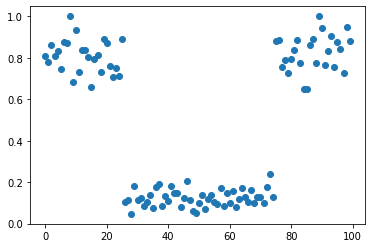

In [12]:

import matplotlib.pyplot as plt


v_cover_order=FR.FLOW(G.edges(),G.nodes(),1)
print(n_s)
xv=[i for i in range(n_s)]

yv=np.zeros((n_s))
for i in range(n_s):
    idx=int(v_cover_order[i,1])
    val=v_cover_order[i,0]
    yv[idx]=val


plt.Figure()
plt.scatter(xv,yv)



Check FlowRank function

In [ ]:
import FlowRank as FR
#print(FR.FLOW_ng(G.edges(),G.nodes(),1)) # (FR, Node#)

node2FR = dict()
for i in FR.FLOW_ng(G.edges(),G.nodes(),1):
    node_num = int(i[1])
    node2FR[node_num] = i[0]

print(node2FR)

In [ ]:
import debug as debug
import matplotlib.pyplot as plt
from collections import defaultdict, deque
import itertools
from sklearn.metrics.cluster import normalized_mutual_info_score as NMI
import Real_Custom

nx_comm.louvain._one_level=debug._one_level


#run time recording
import time
start = time.time()
og_partition = nx_comm.louvain.louvain_partitions(G, seed=0)

final_partition_1 = deque(og_partition, maxlen=1).pop()
end = time.time()


print(final_partition_1)

print("Time taken for original Louvain:",end-start)

label_1=np.zeros((n_s))
c=0
for sets in final_partition_1:
    for ell in sets:
        label_1[ell]=c
    
    c=c+1


start = time.time()
partition = Real_Custom.louvain_partitions(G, seed=0)

final_partition_2 = deque(partition, maxlen=1).pop()
end = time.time()
print(final_partition_2)
print("Time taken for our implementation:",end-start)

label_2=np.zeros((n_s))
c=0
for sets in final_partition_2:
    for ell in sets:
        label_2[ell]=c
    c=c+1


xaxis=[i for i in range(n_s)]

plt.Figure()
plt.scatter(xaxis,label_1,s=2,color='green')
plt.show()

plt.Figure()
plt.scatter(xaxis,label_2,s=2,color='red')
plt.show()


print("The NMI score of original Louvain compared to true label:",round(NMI(label,label_1),3))
print("The NMI score of our implementation compared to true label:",round(NMI(label,label_2),3))
